Data Aggregation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Retail_Sales_Data.csv")

In [3]:
#Explore the dataset
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [6]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [7]:
unique_shopping_mall = data["shopping_mall"].unique()
unique_categories = data["category"].unique()

In [8]:
unique_shopping_mall

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [9]:
unique_categories

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [10]:
transaction_count_by_shopping_mall = data["shopping_mall"].value_counts()


In [11]:
transaction_count_by_shopping_mall

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

In [12]:
#Identify relevant variables
relevant_columns = ["shopping_mall", "price", "category"]


In [13]:
relevant_columns

['shopping_mall', 'price', 'category']

In [14]:
#Group by shopping mall and calculate total sales amount
sales_by_region = data.groupby("shopping_mall")["price"].sum()
sales_by_region

shopping_mall
Cevahir AVM           3433671.84
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Istinye Park          6717077.54
Kanyon               13710755.24
Mall of Istanbul     13851737.62
Metrocity            10249980.07
Metropol AVM          6937992.99
Viaport Outlet        3414019.46
Zorlu Center          3509649.02
Name: price, dtype: float64

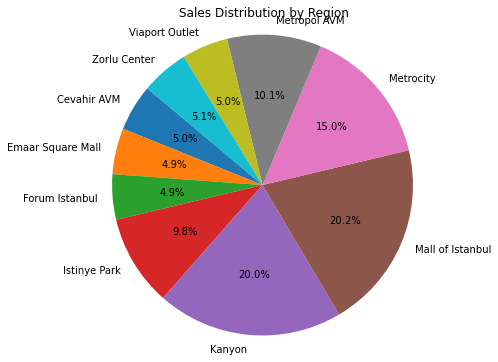

In [15]:
#Create a pie plot to visualize sales distribution by region
plt.figure(figsize=(6, 6))
plt.pie(sales_by_region, labels=sales_by_region.index, autopct="%1.1f%%", startangle=140)
plt.title("Sales Distribution by Region")
plt.axis("equal")  
plt.show()


In [16]:
#Identify top-performing regions
top_regions = sales_by_region.sort_values(ascending=False).head(5)
print("Top-performing regions:")
print(top_regions)

Top-performing regions:
shopping_mall
Mall of Istanbul    13851737.62
Kanyon              13710755.24
Metrocity           10249980.07
Metropol AVM         6937992.99
Istinye Park         6717077.54
Name: price, dtype: float64


In [17]:
#Group by region of shopping mall and product category, calculate total sales
sales_by_region_category = data.groupby(["shopping_mall", "category"])["price"].sum()
sales_by_region_category

shopping_mall  category       
Cevahir AVM    Books                11998.80
               Clothing           1554414.40
               Cosmetics            88394.84
               Food & Beverage      11992.39
               Shoes               884050.41
                                     ...    
Zorlu Center   Food & Beverage      11589.68
               Shoes               953670.13
               Souvenir              8398.68
               Technology          803250.00
               Toys                 54691.84
Name: price, Length: 80, dtype: float64

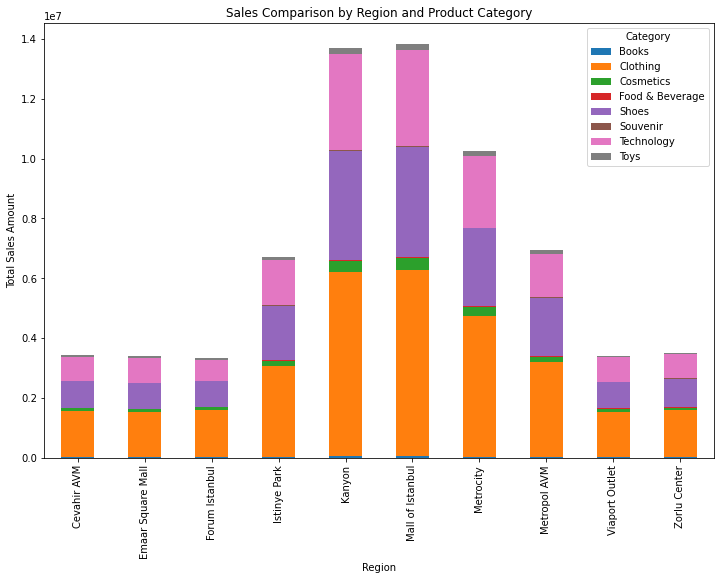

In [18]:
#Create a stacked bar plot to compare sales across regions and categories
sales_by_region_category.unstack().plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Sales Comparison by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title="Category")
plt.show()